### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="4b90dea76fe2d39a4e91a10cf107010e08efbada"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('AAPL1.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL1.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-05 00:00:00+00:00,93.24,94.07,92.68,94.00,35890500,21.809581,22.003724,21.678592,21.987351,143562000,0.57,1.0
1,AAPL,2016-05-06 00:00:00+00:00,92.72,93.45,91.85,93.37,43699886,21.687949,21.858701,21.484449,21.839989,174799544,0.00,1.0
2,AAPL,2016-05-09 00:00:00+00:00,92.79,93.77,92.59,93.00,32936436,21.704322,21.933552,21.657541,21.753443,131745744,0.00,1.0
3,AAPL,2016-05-10 00:00:00+00:00,93.42,93.57,92.11,93.33,33686836,21.851684,21.886770,21.545265,21.830632,134747344,0.00,1.0
4,AAPL,2016-05-11 00:00:00+00:00,92.51,93.57,92.46,93.48,28719109,21.638828,21.886770,21.627132,21.865719,114876436,0.00,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-04-27 00:00:00+00:00,134.39,135.41,134.110,135.01,66015804,134.39,135.41,134.110,135.01,66015804,0.0,1.0
1253,AAPL,2021-04-28 00:00:00+00:00,133.58,135.02,133.080,134.31,107760097,133.58,135.02,133.080,134.31,107760097,0.0,1.0
1254,AAPL,2021-04-29 00:00:00+00:00,133.48,137.07,132.450,136.47,151100953,133.48,137.07,132.450,136.47,151100953,0.0,1.0
1255,AAPL,2021-04-30 00:00:00+00:00,131.46,133.56,131.065,131.78,109839466,131.46,133.56,131.065,131.78,109839466,0.0,1.0
1256,AAPL,2021-05-03 00:00:00+00:00,132.54,134.07,131.830,132.04,75135100,132.54,134.07,131.830,132.04,75135100,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0        93.24
1        92.72
2        92.79
3        93.42
4        92.51
         ...  
1252    134.39
1253    133.58
1254    133.48
1255    131.46
1256    132.54
Name: close, Length: 1257, dtype: float64

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0        93.24
1        92.72
2        92.79
3        93.42
4        92.51
         ...  
1252    134.39
1253    133.58
1254    133.48
1255    131.46
1256    132.54
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.00697535]
 [0.00572459]
 [0.00589296]
 ...
 [0.10376428]
 [0.09890559]
 [0.10150331]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.02090198],
       [0.02068551],
       [0.02239327],
       [0.02042093],
       [0.01683704],
       [0.01712568],
       [0.01635598],
       [0.01734215],
       [0.01200241],
       [0.01144919],
       [0.01339747],
       [0.01253157],
       [0.01385448],
       [0.00736019],
       [0.004089  ],
       [0.0078172 ],
       [0.00976548],
       [0.01265183],
       [0.01334937],
       [0.01118461],
       [0.01248346],
       [0.01346963],
       [0.01524955],
       [0.01597114],
       [0.01702946],
       [0.015

In [20]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 249ms/step - loss: 0.0102 - val_loss: 0.0461
Epoch 2/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0028 - val_loss: 0.0269
Epoch 3/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0017 - val_loss: 0.0307
Epoch 4/100
12/12 [==============================] - 2s 138ms/step - loss: 8.8650e-04 - val_loss: 0.0208
Epoch 5/100
12/12 [==============================] - 2s 136ms/step - loss: 5.6468e-04 - val_loss: 0.0206
Epoch 6/100
12/12 [==============================] - 2s 138ms/step - loss: 4.1044e-04 - val_loss: 0.0204
Epoch 7/100
12/12 [==============================] - 2s 154ms/step - loss: 3.8206e-04 - val_loss: 0.0189
Epoch 8/100
12/12 [==============================] - 2s 147ms/step - loss: 3.7297e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 2s 143ms/step - loss: 3.6052e-04 - val_loss: 0.0184
Epoch 10/100
12/12 [==============================] - 2s 139ms/step

12/12 [==============================] - 2s 163ms/step - loss: 1.3766e-04 - val_loss: 0.0087
Epoch 79/100
12/12 [==============================] - 3s 214ms/step - loss: 1.4196e-04 - val_loss: 0.0084
Epoch 80/100
12/12 [==============================] - 2s 186ms/step - loss: 1.5628e-04 - val_loss: 0.0106
Epoch 81/100
12/12 [==============================] - 2s 185ms/step - loss: 1.6360e-04 - val_loss: 0.0077
Epoch 82/100
12/12 [==============================] - 3s 234ms/step - loss: 1.5150e-04 - val_loss: 0.0086
Epoch 83/100
12/12 [==============================] - 2s 156ms/step - loss: 1.4300e-04 - val_loss: 0.0092
Epoch 84/100
12/12 [==============================] - 2s 173ms/step - loss: 1.3184e-04 - val_loss: 0.0075
Epoch 85/100
12/12 [==============================] - 3s 216ms/step - loss: 1.3496e-04 - val_loss: 0.0093
Epoch 86/100
12/12 [==============================] - 3s 213ms/step - loss: 1.3267e-04 - val_loss: 0.0087
Epoch 87/100
12/12 [==============================] - 2s 17

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.2.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.44003980483237

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

229.6236021002757

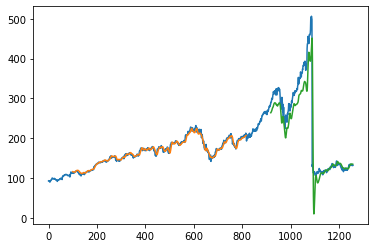

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533973,
 0.10010823812387254,
 0.10535177390258565,
 0.10739627179795552,
 0.10487071557426336,
 0.11316897173782314,
 0.11165363800360789,
 0.11201443174984965,
 0.10984966927239925,
 0.10835838845460005,
 0.10773301262778107,
 0.10831028262176

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10737354]
101
1 day input [0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743
 0.07276007 0.07425135 0.07468431 0.07110042 0.07651233 0.07855683
 0.08553217 0.08627781 0.09034275 0.09625977 0.10259771 0.09837643
 0.10604931 0.10027661 0.10621768

12 day output [[0.11858495]]
13 day input [0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743
 0.07276007 0.07425135 0.07468431 0.07110042 0.07651233 0.07855683
 0.08553217 0.08627781 0.09034275 0.09625977 0.10259771 0.09837643
 0.10604931 0.10027661 0.10621768 0.10539988 0.10703548 0.10287432
 0.10381239 0.10006013 0.10578473 0.10674684 0.1059531  0.10400481
 0.10376428 0.098905

 0.12459488 0.12554218 0.12648053 0.12741196]
22 day output [[0.12833795]]
23 day input [0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489
 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042
 0.07651233 0.07855683 0.08553217 0.08627781 0.09034275 0.09625977
 0.10259771 0.09837643 0.10604931 0.10027661 0.10621768 0.10539988
 0.10703548 0.10287432 0.10381239 0.10006013 0.10578473 0.10674684
 0.1059531  0.10400481 0.10376428 0.09890559 0.10150331 0.10737354
 0.10728976 0.10765015 0.10838331 0.109368

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1257

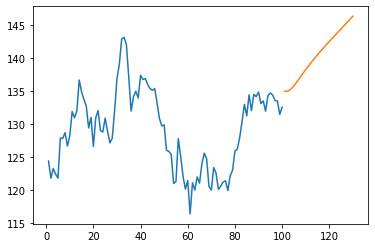

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

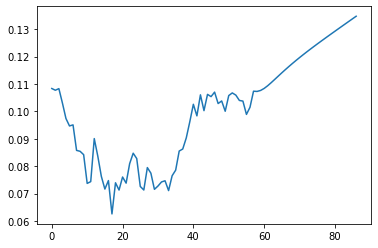

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

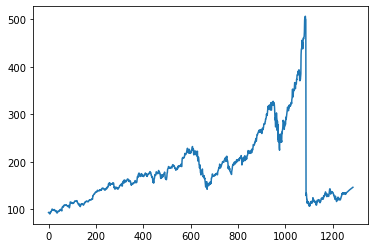

In [48]:
plt.plot(df3)

In [49]:
output_data = pd.DataFrame(df3[1257:1289],columns = ['result'])
output_data.to_csv("output1.csv")

In [50]:
### the desired result
df3[1257:1289] 

[[134.980547439456],
 [134.9457182624936],
 [135.0955481530726],
 [135.40036230549217],
 [135.810004722476],
 [136.27886665254832],
 [136.7740889789164],
 [137.2753144131601],
 [137.77147840350867],
 [138.25737082228065],
 [138.7311021463573],
 [139.1923812033236],
 [139.64169121548534],
 [140.0798437485099],
 [140.5078238324821],
 [140.92672801032663],
 [141.33769619107247],
 [141.74184350311756],
 [142.14032224580646],
 [142.53416081532836],
 [142.92428229019046],
 [143.3115230166912],
 [143.69650251060725],
 [144.07975355550647],
 [144.4616230802238],
 [144.84238986685872],
 [145.22217781856656],
 [145.60100552082062],
 [145.97888536393643],
 [146.35573681086302]]

In [52]:
import pickle
pklfile= "C://Users/harsh/Desktop/Major Project/endsem/krish naik stock prediction/Stock-MArket-Forecasting/model.pkl"
weigh= model.get_weights()
try:
    fpkl= open(pklfile, 'wb')    #Python 3     
    pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()
except:
    fpkl= open(pklfile, 'w')    #Python 2      
    pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()

In [53]:
model1 = pickle.load(open('model.pkl','rb'))
# print(model.predict([[]]))
